In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/266/Tacotron2')

In [ ]:
!pip install nemo_toolkit['all']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Prep

In [ ]:
from nemo.collections.tts.models import HifiGanModel

vocoder = HifiGanModel.from_pretrained(model_name="nvidia/tts_hifigan")
vocoder = vocoder.to("cpu").eval()



[NeMo W 2025-12-07 06:57:31 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2025-12-07 06:57:31 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segmen

[NeMo I 2025-12-07 06:57:31 nemo_logging:393] PADDING: 0


[NeMo W 2025-12-07 06:57:31 nemo_logging:405] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2025-12-07 06:57:31 nemo_logging:393] PADDING: 0
[NeMo I 2025-12-07 06:57:33 nemo_logging:393] Model HifiGanModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--tts_hifigan/snapshots/3ba1fed954276287015654bf4c78060ffc9a4772/tts_hifigan.nemo.


Input Text: He had been in the employ of a corn-chandler at Islington, and went into London with his master's cart and horse.


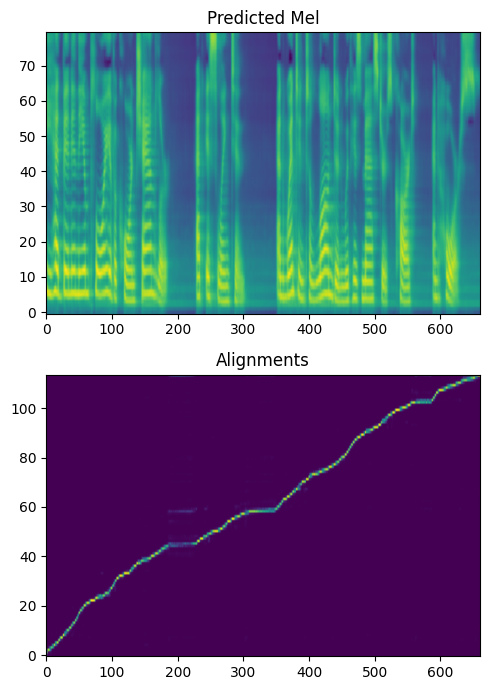

TypeError: All arguments must be passed by kwargs only for typed methods

In [ ]:
import pandas as pd
from model import Tacotron2Config, Tacotron2
import torch
from tokenizer import Tokenizer
import matplotlib.pyplot as plt
from IPython.display import Audio
from dataset import AudioMelConversions

data = pd.read_csv("/content/drive/MyDrive/266/datasplit/test_metadata.csv")

config = Tacotron2Config()
model = Tacotron2(config)
tokenizer = Tokenizer()
a2m = AudioMelConversions()

state_dict = torch.load('/content/drive/MyDrive/266/Tacotron2_O/work_dir/tacotron2/checkpoint_75/pytorch_model.bin', map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model.eval()

def inference(text):
    print(f"Input Text: {text}")

    tokens = tokenizer.encode(text).unsqueeze(0)
    output, alignments = model.inference(tokens)

    fig, axes = plt.subplots(2, 1, figsize=(5, 7))
    axes[0].imshow(output[0].T, aspect='auto', origin='lower')
    axes[0].set_title("Predicted Mel")
    axes[1].imshow(alignments[0].T, aspect='auto', origin='lower')
    axes[1].set_title("Alignments")
    plt.tight_layout()
    plt.show()

    # ---- HiFi-GAN (NeMo) ----
    mel = output.transpose(1, 2)  # [1, 80, T]

    with torch.no_grad():
        gen_audio = vocoder.generator(mel).squeeze().cpu().numpy()

    display(Audio(gen_audio, rate=22050))




inference(data["normalized_transcript"][0])

Input Text: Generative artificial intelligence is an interesting subject.


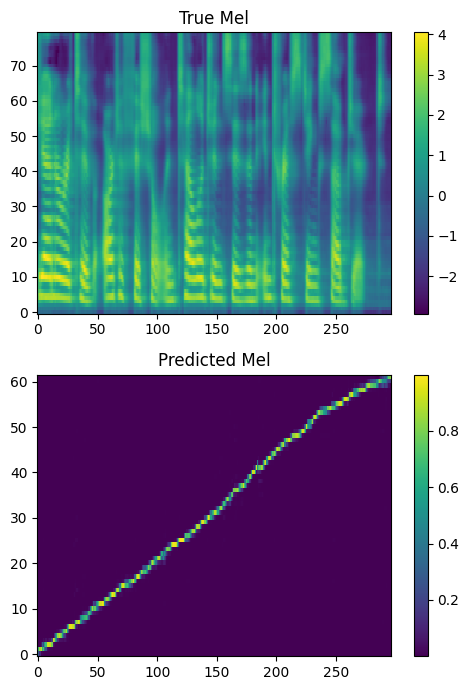

In [ ]:
inference("Generative artificial intelligence is an interesting subject.")